In [1]:
! ls data/
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
# covid data repo


budget-sample.csv  BX-Police.csv  Iris.csv  Sales.csv  Stocks.csv


# Using budget-sample.csv
* Plot a histogram of the base_salary.  Write one sentence about what this tells you about base salaries.
* Make a boxplot of base salaries, what does this tell you about base salaries?
* Make a boxplot of base salaries per (or by) work_location_borough, what does this tell you about the difference in working in each location?
* Make a plot visualizing the difference average base salaries based on agency_name.  Who would you want to work for based on this information?
<br><br>
* __Tell me something new, cool, and interesting about this data__


In [2]:
df = pd.read_csv('data/budget-sample.csv')
df['base_salary'].head()


0     37816.0
1     63125.0
2    121226.0
3     77318.0
4     46333.0
Name: base_salary, dtype: float64

Salaries are't equally distributed


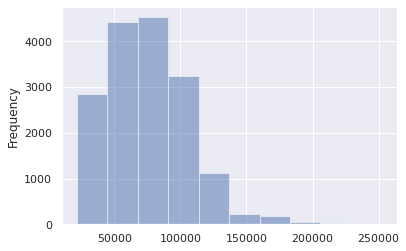

In [3]:
ax = df['base_salary'].plot.hist(alpha=0.5)
print('Salaries are\'t equally distributed')

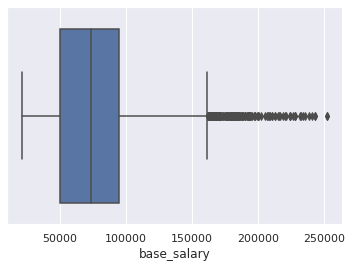

In [4]:
sns.boxplot(data = df, x = "base_salary")


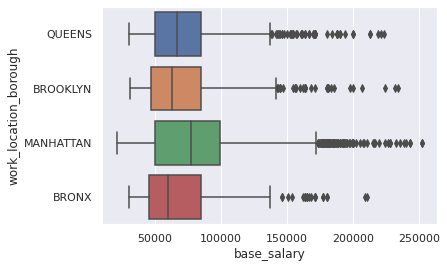

In [5]:
sns.boxplot(data = df, x = "base_salary", y = "work_location_borough")


In [6]:
df.work_location_borough.value_counts()


MANHATTAN    11083
QUEENS        2367
BROOKLYN      2121
BRONX         1089
Name: work_location_borough, dtype: int64

In [7]:
df[df["agency_name"] == "NYC FIRE PENSION FUND"]


,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
1240,2020,257,NYC FIRE PENSION FUND,DUNN,PATRICK,M,08/28/2017,MANHATTAN,EXECUTIVE DIRECTOR,ACTIVE,227786.0,per Annum,1820.0,224324.81,0.0,0.0,0.0


# Using the BX-Police.csv data:
* create a time series chart illustrating their average base salary over time (by fiscal_year).  
* What trend does this show? 
* Why do you think the trend exists?


In [8]:
df = pd.read_csv('data/BX-Police.csv')
df.head()

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2019,56.0,POLICE DEPARTMENT,GUZMAN,ALBERTO,NaN,07/05/2017,BRONX,POLICE OFFICER,ACTIVE,45000.0,per Annum,2040.00,43541.17,243.83,8597.10,3710.14
1,2015,NaN,POLICE DEPARTMENT,DERASMO,MARIELENA,NaN,07/06/2010,BRONX,POLICE OFFICER,ACTIVE,56609.0,per Annum,2085.72,54578.49,335.83,13344.33,4387.03
2,2018,56.0,POLICE DEPARTMENT,GARCES,MICHAEL,A,01/09/2013,BRONX,POLICE OFFICER,ACTIVE,63125.0,per Annum,2045.72,62809.14,145.00,7349.27,9801.34
3,2017,NaN,POLICE DEPARTMENT,ROSSI,THOMAS,C,01/06/2016,BRONX,POLICE OFFICER,ACTIVE,46805.0,per Annum,2051.43,49411.14,121.00,4213.27,6490.72
4,2019,56.0,POLICE DEPARTMENT,GARRETT,DENISE,NaN,05/30/2001,BRONX,SCHOOL SAFETY AGENT,ACTIVE,46737.0,per Annum,2040.00,46608.91,0.00,0.00,1202.56


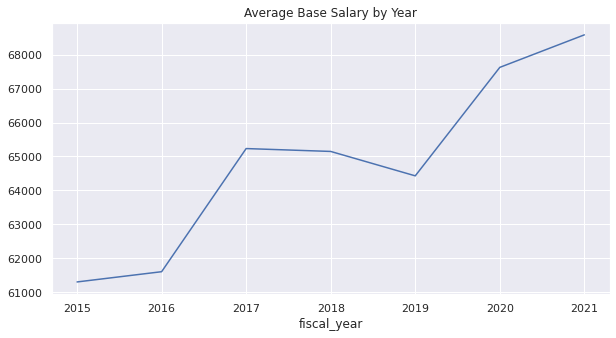

In [9]:
# grouping by year 
gb = df.groupby('fiscal_year')

# getting the average salary by year
avg_salary = gb['base_salary'].mean()
avg_salary.plot(title='Average Base Salary by Year', figsize=(10,5));

# Using Stocks.csv
* Tell me a story about the Google stock for the year. 
* Any story you'd like to tell. 


In [10]:
df = pd.read_csv('data/Stocks.csv')
df.head()

,Date,Volume,High,Low,Open,Close,Adj Close,Ticker
0,2021-01-04,1901900,1760.650024,1707.849976,1757.540039,1728.239990,1728.239990,GOOG
1,2021-01-05,1145300,1747.670044,1718.015015,1725.000000,1740.920044,1740.920044,GOOG
2,2021-01-06,2602100,1748.000000,1699.000000,1702.630005,1735.290039,1735.290039,GOOG
3,2021-01-07,2265000,1788.400024,1737.050049,1740.060059,1787.250000,1787.250000,GOOG
4,2021-01-08,2050600,1809.839966,1773.535034,1787.979980,1807.209961,1807.209961,GOOG


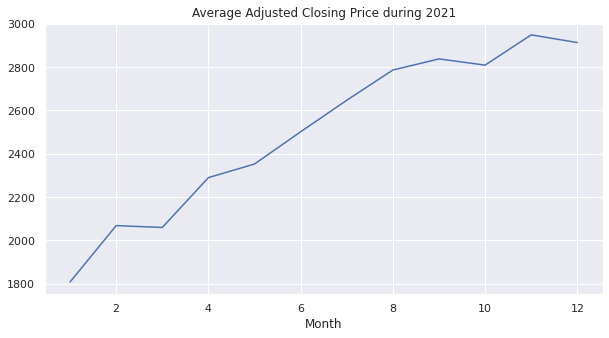

In [11]:
# using the date column to extract months
dates = list(df['Date'])
month = []

for date in dates: # extraction 
    partition = date.split('-')
    month.append(int(partition[1]))

# new column containing month number
df['Month'] = month
# plotting average adjusted closing price for that month 
gb = df.groupby('Month') 
adjusted_closing = gb['Adj Close'].mean()
adjusted_closing.plot(title='Average Adjusted Closing Price during 2021',figsize=(10,5));

# Using Sales.csv 
* make a time series chart that shows the sales for each item over the past 12 months.  
* What does this tell you about the items.  
* Which item would you recommend they push more of and which item/s would you recommend they stop selling?
* show what percentage of each item contributes to total sales. 


In [12]:
# load data
df = pd.read_csv('data/Sales.csv')
print(df.shape)
columns = list(df.columns)
columns.remove("month_number")

(12, 7)


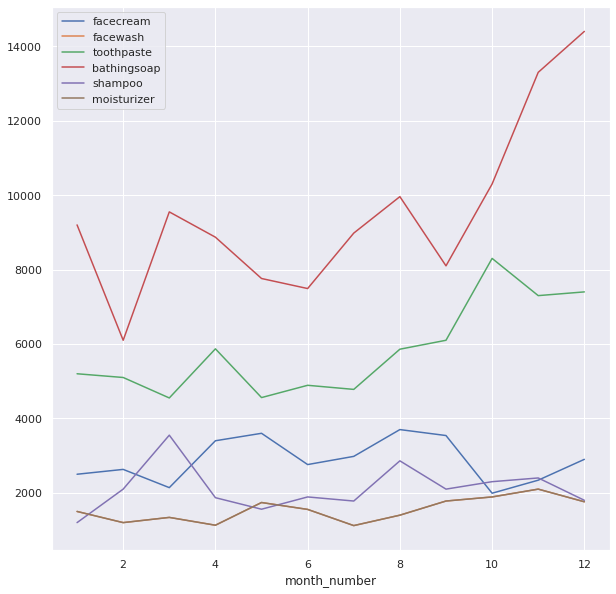

In [13]:
fig, ax = plt.subplots()

#df.plot(kind="line", x = "month_number", y = "facecream", ax = ax)
#df.plot(kind="line", x = "month_number", y = "facewash", ax = ax)

# try to make it easier to do

for item in columns:
    df.plot(kind="line", x = "month_number", y = item, ax = ax, figsize=(10,10))
    

plt.legend()
plt.show()

# would be nice to move the legend